In [41]:
import numpy as np
import pandas as pd
import vectorbtpro as vbt

In [42]:
m1_data = vbt.HDFData.fetch('../data/MultiAsset_OHLCV_3Y_m1.h5')

  0%|          | 0/5 [00:00<?, ?it/s]

/opt/miniconda3/envs/vbt/lib/python3.10/site-packages/vectorbtpro/data/base.py:674: UserWarning: Symbols have mismatching index. Setting missing data points to NaN.
  data = cls.align_index(data, missing=missing_index, silence_warnings=silence_warnings)


In [43]:
m1_data.symbols

['AUDUSD', 'EURUSD', 'GBPUSD', 'USDCAD', 'USDJPY']

In [44]:
m1_data.get('Close')

symbol                       AUDUSD    EURUSD    GBPUSD    USDCAD    USDJPY
time                                                                       
2019-12-02 03:29:00+00:00  0.676920  1.102510  1.291060  1.327435  109.5305
2019-12-02 03:30:00+00:00  0.676935  1.102475  1.290995  1.327435  109.5345
2019-12-02 03:31:00+00:00  0.676910  1.102695  1.291465  1.327485  109.5300
2019-12-02 03:32:00+00:00  0.676900  1.102680  1.291460  1.327635  109.5345
2019-12-02 03:33:00+00:00  0.676885  1.102455  1.291410  1.327655  109.5440
...                             ...       ...       ...       ...       ...
2022-11-23 06:39:00+00:00       NaN       NaN  1.225635       NaN       NaN
2022-11-23 06:40:00+00:00       NaN       NaN  1.225730       NaN       NaN
2022-11-23 06:41:00+00:00       NaN       NaN  1.225720       NaN       NaN
2022-11-23 06:42:00+00:00       NaN       NaN  1.225580       NaN       NaN
2022-11-23 06:43:00+00:00       NaN       NaN  1.225530       NaN       NaN

[1118810 rows x 5 columns]

In [45]:
m1_data.wrapper.index

DatetimeIndex(['2019-12-02 03:29:00+00:00', '2019-12-02 03:30:00+00:00',
               '2019-12-02 03:31:00+00:00', '2019-12-02 03:32:00+00:00',
               '2019-12-02 03:33:00+00:00', '2019-12-02 03:34:00+00:00',
               '2019-12-02 03:35:00+00:00', '2019-12-02 03:36:00+00:00',
               '2019-12-02 03:37:00+00:00', '2019-12-02 03:38:00+00:00',
               ...
               '2022-11-23 06:34:00+00:00', '2022-11-23 06:35:00+00:00',
               '2022-11-23 06:36:00+00:00', '2022-11-23 06:37:00+00:00',
               '2022-11-23 06:38:00+00:00', '2022-11-23 06:39:00+00:00',
               '2022-11-23 06:40:00+00:00', '2022-11-23 06:41:00+00:00',
               '2022-11-23 06:42:00+00:00', '2022-11-23 06:43:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1118810, freq=None)

In [46]:
m15_data = m1_data.resample('15T')  # Convert 1 minute to 15 mins
h1_data = m1_data.resample("1h")    # Convert 1 minute to 1 hour
h4_data = m1_data.resample('4h')    # Convert 1 minute to 4 hour

In [47]:
m15_data.wrapper.index

DatetimeIndex(['2019-12-02 03:15:00+00:00', '2019-12-02 03:30:00+00:00',
               '2019-12-02 03:45:00+00:00', '2019-12-02 04:00:00+00:00',
               '2019-12-02 04:15:00+00:00', '2019-12-02 04:30:00+00:00',
               '2019-12-02 04:45:00+00:00', '2019-12-02 05:00:00+00:00',
               '2019-12-02 05:15:00+00:00', '2019-12-02 05:30:00+00:00',
               ...
               '2022-11-23 04:15:00+00:00', '2022-11-23 04:30:00+00:00',
               '2022-11-23 04:45:00+00:00', '2022-11-23 05:00:00+00:00',
               '2022-11-23 05:15:00+00:00', '2022-11-23 05:30:00+00:00',
               '2022-11-23 05:45:00+00:00', '2022-11-23 06:00:00+00:00',
               '2022-11-23 06:15:00+00:00', '2022-11-23 06:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=104366, freq='15T')

In [48]:
# Obtain all the closing  prices using the .get() method
m15_close = m15_data.get('Close')

## h1 data
h1_open  = h1_data.get('Open')
h1_close = h1_data.get('Close')
h1_high  = h1_data.get('High')
h1_low   = h1_data.get('Low')

## h4 data
h4_open  = h4_data.get('Open')
h4_close = h4_data.get('Close')
h4_high  = h4_data.get('High')
h4_low   = h4_data.get('Low')

### Create (manuall) the indicators for Multi-Time Frames

In [49]:
rsi_period = 21

## 15m indicators
m15_rsi = vbt.talib("RSI", timeperiod = rsi_period).run(m15_close, skipna=True).real.ffill()
m15_bbands = vbt.talib("BBANDS").run(m15_close, skipna=True)
m15_bbands_rsi = vbt.talib("BBANDS").run(m15_rsi, skipna=True)

## h4 indicators
h1_rsi = vbt.talib("RSI", timeperiod = rsi_period).run(h1_close, skipna=True).real.ffill()
h1_bbands = vbt.talib("BBANDS").run(h1_close, skipna=True)
h1_bbands_rsi = vbt.talib("BBANDS").run(h1_rsi, skipna=True)

## h4 indicators
h4_rsi = vbt.talib("RSI", timeperiod = rsi_period).run(h4_close, skipna=True).real.ffill()
h4_bbands = vbt.talib("BBANDS").run(h4_close, skipna=True)
h4_bbands_rsi = vbt.talib("BBANDS").run(h4_rsi, skipna=True)

In [50]:
def create_resamplers(result_dict_keys_list : list, source_indices : list,  
                      source_frequencies :list, target_index : pd.Series, target_freq : str):
    """
    Creates a dictionary of vbtpro resampler objects.

    Parameters
    ==========
    result_dict_keys_list : list, list of strings, which are keys of the output dictionary
    source_indices        : list, list of pd.time series objects of the higher timeframes
    source_frequencies    : list(str), which are short form representation of time series order. Eg:["1D", "4h"]
    target_index          : pd.Series, target time series for the resampler objects
    target_freq           : str, target time frequency for the resampler objects

    Returns
    ===========
    resamplers_dict       : dict, vbt pro resampler objects
    """
    
    
    resamplers = []
    for si, sf in zip(source_indices, source_frequencies):
        resamplers.append(vbt.Resampler(source_index = si,  target_index = target_index,
                                        source_freq = sf, target_freq = target_freq))
    return dict(zip(result_dict_keys_list, resamplers))

In [51]:
## Initialize  dictionary
mtf_data = {}

In [52]:
col_values = [
    m15_close, m15_rsi, m15_bbands.upperband, m15_bbands.middleband, m15_bbands.lowerband, 
    m15_bbands_rsi.upperband, m15_bbands_rsi.middleband, m15_bbands_rsi.lowerband
    ]

col_keys = [
    "m15_close", "m15_rsi", "m15_bband_price_upper",  "m15_bband_price_middle", "m15_bband_price_lower", 
    "m15_bband_rsi_upper",  "m15_bband_rsi_middle", "m15_bband_rsi_lower"
         ]

# Assign key, value pairs for method of time series data to store in data dict
for key, time_series in zip(col_keys, col_values):
    mtf_data[key] = time_series.ffill()

In [53]:
## Create Resampler Objects for upsampling
src_indices = [h1_close.index, h4_close.index]
src_frequencies = ["1H","4H"] 
resampler_dict_keys = ["h1_m15","h4_m15"]

list_resamplers = create_resamplers(resampler_dict_keys, src_indices, src_frequencies, m15_close.index, "15T")

list_resamplers

{'h1_m15': <vectorbtpro.base.resampling.base.Resampler at 0x290860b50>,
 'h4_m15': <vectorbtpro.base.resampling.base.Resampler at 0x290861e40>}

In [54]:
## Use along with  Manual indicator creation method for MTF
series_to_resample = [
    [h1_open, h1_high, h1_low, h1_close, h1_rsi, h1_bbands.upperband, h1_bbands.middleband, h1_bbands.lowerband,
     h1_bbands_rsi.upperband, h1_bbands_rsi.middleband, h1_bbands_rsi.lowerband], 
    [h4_high, h4_low, h4_close, h4_rsi, h4_bbands.upperband, h4_bbands.middleband, h4_bbands.lowerband, 
    h4_bbands_rsi.upperband, h4_bbands_rsi.middleband, h4_bbands_rsi.lowerband]
    ]


data_keys = [
    ["h1_open","h1_high", "h1_low", "h1_close", "h1_rsi", "h1_bband_price_upper",  "h1_bband_price_middle",  "h1_bband_price_lower", 
     "h1_bband_rsi_upper",  "h1_bband_rsi_middle", "h1_bband_rsi_lower"],
    ["h4_open","h4_high", "h4_low", "h4_close", "h4_rsi", "h4_bband_price_upper",  "h4_bband_price_middle",  "h4_bband_price_lower", 
     "h4_bband_rsi_upper",  "h4_bband_rsi_middle", "h4_bband_rsi_lower"]
         ]

In [55]:
for lst_series, lst_keys, resampler in zip(series_to_resample, data_keys, resampler_dict_keys):
    for key, time_series in zip(lst_keys, lst_series):
        if key.lower().endswith('open'):
            print(f'Resampling {key} differently using vbt.resample_opening using "{resampler}" resampler')
            resampled_time_series = time_series.vbt.resample_opening(list_resamplers[resampler])
        else:
            resampled_time_series = time_series.vbt.resample_closing(list_resamplers[resampler])
        mtf_data[key] = resampled_time_series

Resampling h1_open differently using vbt.resample_opening using "h1_m15" resampler
Resampling h4_open differently using vbt.resample_opening using "h4_m15" resampler


In [56]:
cols_order = ['m15_close', 'm15_rsi', 'm15_bband_price_upper','m15_bband_price_middle', 'm15_bband_price_lower',
              'm15_bband_rsi_upper','m15_bband_rsi_middle', 'm15_bband_rsi_lower',
              'h1_open', 'h1_high', 'h1_low', 'h1_close', 'h1_rsi',
              'h1_bband_price_upper', 'h1_bband_price_middle', 'h1_bband_price_lower', 
              'h1_bband_rsi_upper', 'h1_bband_rsi_middle', 'h1_bband_rsi_lower',              
              'h4_open', 'h4_high', 'h4_low', 'h4_close', 'h4_rsi',
              'h4_bband_price_upper', 'h4_bband_price_middle', 'h4_bband_price_lower', 
              'h4_bband_rsi_upper', 'h4_bband_rsi_middle', 'h4_bband_rsi_lower'
              ]

In [57]:
list(mtf_data.keys())

['m15_close',
 'm15_rsi',
 'm15_bband_price_upper',
 'm15_bband_price_middle',
 'm15_bband_price_lower',
 'm15_bband_rsi_upper',
 'm15_bband_rsi_middle',
 'm15_bband_rsi_lower',
 'h1_open',
 'h1_high',
 'h1_low',
 'h1_close',
 'h1_rsi',
 'h1_bband_price_upper',
 'h1_bband_price_middle',
 'h1_bband_price_lower',
 'h1_bband_rsi_upper',
 'h1_bband_rsi_middle',
 'h1_bband_rsi_lower',
 'h4_open',
 'h4_high',
 'h4_low',
 'h4_close',
 'h4_rsi',
 'h4_bband_price_upper',
 'h4_bband_price_middle',
 'h4_bband_price_lower',
 'h4_bband_rsi_upper',
 'h4_bband_rsi_middle']

In [58]:
mtf_data.get('m15_rsi')

symbol                        AUDUSD     EURUSD     GBPUSD     USDCAD  \
time                                                                    
2019-12-02 03:15:00+00:00        NaN        NaN        NaN        NaN   
2019-12-02 03:30:00+00:00        NaN        NaN        NaN        NaN   
2019-12-02 03:45:00+00:00        NaN        NaN        NaN        NaN   
2019-12-02 04:00:00+00:00        NaN        NaN        NaN        NaN   
2019-12-02 04:15:00+00:00        NaN        NaN        NaN        NaN   
...                              ...        ...        ...        ...   
2022-11-23 05:30:00+00:00  48.959172  58.093735  63.261495  50.233961   
2022-11-23 05:45:00+00:00  48.959172  58.093735  63.640822  50.233961   
2022-11-23 06:00:00+00:00  48.959172  58.093735  65.201321  50.233961   
2022-11-23 06:15:00+00:00  48.959172  58.093735  65.567926  50.233961   
2022-11-23 06:30:00+00:00  48.959172  58.093735  61.725239  50.233961   

symbol                       USDJPY  
time                                 
2019-12-02 03:15:00+00:00       NaN  
2019-12-02 03:30:00+00:00       NaN  
2019-12-02 03:45:00+00:00       NaN  
2019-12-02 04:00:00+00:00       NaN  
2019-12-02 04:15:00+00:00       NaN  
...                             ...  
2022-11-23 05:30:00+00:00  35.01624  
2022-11-23 05:45:00+00:00  35.01624  
2022-11-23 06:00:00+00:00  35.01624  
2022-11-23 06:15:00+00:00  35.01624  
2022-11-23 06:30:00+00:00  35.01624  

[104366 rows x 5 columns]

### Double Bollinger Band - Strategy Conditions

In [59]:
required_cols = ['m15_close','m15_rsi','m15_bband_rsi_lower', 'm15_bband_rsi_upper',
                 'h4_low', "h4_rsi", "h4_bband_price_lower", "h4_bband_price_upper" ]

In [73]:
## Higher values greater than 1.0 are like moving up the lower RSI b-band, 
## signifying if the lowerband rsi is anywhere around 1% of the lower b-band validate that case as True
bb_upper_fract = 0.99
bb_lower_fract = 1.01

## Long Entry Conditions
# c1_long_entry = (mtf_data['h1_low'] <= mtf_data['h1_bband_price_lower'])
c1_long_entry = (mtf_data['h4_low'] <= mtf_data['h4_bband_price_lower'])
c2_long_entry = (mtf_data['m15_rsi'] <= (bb_lower_fract * mtf_data['m15_bband_rsi_lower']) )


## Long Exit Conditions
# c1_long_exit =  (mtf_data['h1_high'] >= mtf_data['h1_bband_price_upper'])
c1_long_exit =  (mtf_data['h4_high'] >= mtf_data['h4_bband_price_upper'])
c2_long_exit = (mtf_data['m15_rsi'] >= (bb_upper_fract * mtf_data['m15_bband_rsi_upper'])) 

In [74]:
c1_long_entry

symbol                     AUDUSD  EURUSD  GBPUSD  USDCAD  USDJPY
time                                                             
2019-12-02 03:15:00+00:00   False   False   False   False   False
2019-12-02 03:30:00+00:00   False   False   False   False   False
2019-12-02 03:45:00+00:00   False   False   False   False   False
2019-12-02 04:00:00+00:00   False   False   False   False   False
2019-12-02 04:15:00+00:00   False   False   False   False   False
...                           ...     ...     ...     ...     ...
2022-11-23 05:30:00+00:00    True    True    True    True   False
2022-11-23 05:45:00+00:00    True    True    True    True   False
2022-11-23 06:00:00+00:00    True    True    True    True   False
2022-11-23 06:15:00+00:00    True    True    True    True   False
2022-11-23 06:30:00+00:00    True    True    True    True   False

[104366 rows x 5 columns]

In [85]:
pd.concat([mtf_data[col][c1_long_entry].add_suffix(col) for col in required_cols], axis = 1)

symbol                     AUDUSDm15_close  EURUSDm15_close  GBPUSDm15_close  \
time                                                                           
2019-12-02 03:15:00+00:00              NaN              NaN              NaN   
2019-12-02 03:30:00+00:00              NaN              NaN              NaN   
2019-12-02 03:45:00+00:00              NaN              NaN              NaN   
2019-12-02 04:00:00+00:00              NaN              NaN              NaN   
2019-12-02 04:15:00+00:00              NaN              NaN              NaN   
...                                    ...              ...              ...   
2022-11-23 05:30:00+00:00         0.680355          1.05078         1.225395   
2022-11-23 05:45:00+00:00         0.680355          1.05078         1.225615   
2022-11-23 06:00:00+00:00         0.680355          1.05078         1.226525   
2022-11-23 06:15:00+00:00         0.680355          1.05078         1.226740   
2022-11-23 06:30:00+00:00         0.680355          1.05078         1.225530   

symbol                     USDCADm15_close  USDJPYm15_close  AUDUSDm15_rsi  \
time                                                                         
2019-12-02 03:15:00+00:00              NaN              NaN            NaN   
2019-12-02 03:30:00+00:00              NaN              NaN            NaN   
2019-12-02 03:45:00+00:00              NaN              NaN            NaN   
2019-12-02 04:00:00+00:00              NaN              NaN            NaN   
2019-12-02 04:15:00+00:00              NaN              NaN            NaN   
...                                    ...              ...            ...   
2022-11-23 05:30:00+00:00          1.34296              NaN      48.959172   
2022-11-23 05:45:00+00:00          1.34296              NaN      48.959172   
2022-11-23 06:00:00+00:00          1.34296              NaN      48.959172   
2022-11-23 06:15:00+00:00          1.34296              NaN      48.959172   
2022-11-23 06:30:00+00:00          1.34296              NaN      48.959172   

symbol                     EURUSDm15_rsi  GBPUSDm15_rsi  USDCADm15_rsi  \
time                                                                     
2019-12-02 03:15:00+00:00            NaN            NaN            NaN   
2019-12-02 03:30:00+00:00            NaN            NaN            NaN   
2019-12-02 03:45:00+00:00            NaN            NaN            NaN   
2019-12-02 04:00:00+00:00            NaN            NaN            NaN   
2019-12-02 04:15:00+00:00            NaN            NaN            NaN   
...                                  ...            ...            ...   
2022-11-23 05:30:00+00:00      58.093735      63.261495      50.233961   
2022-11-23 05:45:00+00:00      58.093735      63.640822      50.233961   
2022-11-23 06:00:00+00:00      58.093735      65.201321      50.233961   
2022-11-23 06:15:00+00:00      58.093735      65.567926      50.233961   
2022-11-23 06:30:00+00:00      58.093735      61.725239      50.233961   

symbol                     USDJPYm15_rsi  ...  AUDUSDh4_bband_price_lower  \
time                                      ...                               
2019-12-02 03:15:00+00:00            NaN  ...                         NaN   
2019-12-02 03:30:00+00:00            NaN  ...                         NaN   
2019-12-02 03:45:00+00:00            NaN  ...                         NaN   
2019-12-02 04:00:00+00:00            NaN  ...                         NaN   
2019-12-02 04:15:00+00:00            NaN  ...                         NaN   
...                                  ...  ...                         ...   
2022-11-23 05:30:00+00:00            NaN  ...                   61.126575   
2022-11-23 05:45:00+00:00            NaN  ...                   61.126575   
2022-11-23 06:00:00+00:00            NaN  ...                   61.126575   
2022-11-23 06:15:00+00:00            NaN  ...                   61.126575   
2022-11-23 06:30:00+00:00            NaN  ...            

In [86]:
pd.concat([mtf_data[col][c2_long_entry].add_suffix(col) for col in required_cols], axis = 1)

symbol                     AUDUSDm15_close  EURUSDm15_close  GBPUSDm15_close  \
time                                                                           
2019-12-02 03:15:00+00:00              NaN              NaN              NaN   
2019-12-02 03:30:00+00:00              NaN              NaN              NaN   
2019-12-02 03:45:00+00:00              NaN              NaN              NaN   
2019-12-02 04:00:00+00:00              NaN              NaN              NaN   
2019-12-02 04:15:00+00:00              NaN              NaN              NaN   
...                                    ...              ...              ...   
2022-11-23 05:30:00+00:00         0.680355          1.05078              NaN   
2022-11-23 05:45:00+00:00         0.680355          1.05078              NaN   
2022-11-23 06:00:00+00:00         0.680355          1.05078              NaN   
2022-11-23 06:15:00+00:00         0.680355          1.05078              NaN   
2022-11-23 06:30:00+00:00         0.680355          1.05078              NaN   

symbol                     USDCADm15_close  USDJPYm15_close  AUDUSDm15_rsi  \
time                                                                         
2019-12-02 03:15:00+00:00              NaN              NaN            NaN   
2019-12-02 03:30:00+00:00              NaN              NaN            NaN   
2019-12-02 03:45:00+00:00              NaN              NaN            NaN   
2019-12-02 04:00:00+00:00              NaN              NaN            NaN   
2019-12-02 04:15:00+00:00              NaN              NaN            NaN   
...                                    ...              ...            ...   
2022-11-23 05:30:00+00:00          1.34296         135.4435      48.959172   
2022-11-23 05:45:00+00:00          1.34296         135.4435      48.959172   
2022-11-23 06:00:00+00:00          1.34296         135.4435      48.959172   
2022-11-23 06:15:00+00:00          1.34296         135.4435      48.959172   
2022-11-23 06:30:00+00:00          1.34296         135.4435      48.959172   

symbol                     EURUSDm15_rsi  GBPUSDm15_rsi  USDCADm15_rsi  \
time                                                                     
2019-12-02 03:15:00+00:00            NaN            NaN            NaN   
2019-12-02 03:30:00+00:00            NaN            NaN            NaN   
2019-12-02 03:45:00+00:00            NaN            NaN            NaN   
2019-12-02 04:00:00+00:00            NaN            NaN            NaN   
2019-12-02 04:15:00+00:00            NaN            NaN            NaN   
...                                  ...            ...            ...   
2022-11-23 05:30:00+00:00      58.093735            NaN      50.233961   
2022-11-23 05:45:00+00:00      58.093735            NaN      50.233961   
2022-11-23 06:00:00+00:00      58.093735            NaN      50.233961   
2022-11-23 06:15:00+00:00      58.093735            NaN      50.233961   
2022-11-23 06:30:00+00:00      58.093735            NaN      50.233961   

symbol                     USDJPYm15_rsi  ...  AUDUSDh4_bband_price_lower  \
time                                      ...                               
2019-12-02 03:15:00+00:00            NaN  ...                         NaN   
2019-12-02 03:30:00+00:00            NaN  ...                         NaN   
2019-12-02 03:45:00+00:00            NaN  ...                         NaN   
2019-12-02 04:00:00+00:00            NaN  ...                         NaN   
2019-12-02 04:15:00+00:00            NaN  ...                         NaN   
...                                  ...  ...                         ...   
2022-11-23 05:30:00+00:00       35.01624  ...                   61.126575   
2022-11-23 05:45:00+00:00       35.01624  ...                   61.126575   
2022-11-23 06:00:00+00:00       35.01624  ...                   61.126575   
2022-11-23 06:15:00+00:00       35.01624  ...                   61.126575   
2022-11-23 06:30:00+00:00       35.01624  ...            

In [96]:
## Strategy conditions check - Using m15 and h4 data 
mtf_data['entries'] = c1_long_entry & c2_long_entry
mtf_data['exits']  = c1_long_exit & c2_long_exit

In [97]:
mtf_data['signal'] = 0   
mtf_data['signal'] = np.where( mtf_data['entries'], 1, 0)
mtf_data['signal'] = np.where( mtf_data['exits'] , -1, mtf_data['signal'])

In [98]:
print(type(mtf_data['signal']), "\nShape:", mtf_data['signal'].shape )
mtf_data['signal']

<class 'numpy.ndarray'> 
Shape: (104366, 5)


array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       ...,
       [ 1, -1,  0,  1,  0],
       [ 1, -1,  0,  1,  0],
       [ 1, -1,  0,  1,  0]])

In [99]:
mtf_data['entries']

symbol                     AUDUSD  EURUSD  GBPUSD  USDCAD  USDJPY
time                                                             
2019-12-02 03:15:00+00:00   False   False   False   False   False
2019-12-02 03:30:00+00:00   False   False   False   False   False
2019-12-02 03:45:00+00:00   False   False   False   False   False
2019-12-02 04:00:00+00:00   False   False   False   False   False
2019-12-02 04:15:00+00:00   False   False   False   False   False
...                           ...     ...     ...     ...     ...
2022-11-23 05:30:00+00:00    True    True   False    True   False
2022-11-23 05:45:00+00:00    True    True   False    True   False
2022-11-23 06:00:00+00:00    True    True   False    True   False
2022-11-23 06:15:00+00:00    True    True   False    True   False
2022-11-23 06:30:00+00:00    True    True   False    True   False

[104366 rows x 5 columns]

**`Cleaning` and Resample `entries` and `exits` to H4 timeframe**

In [104]:
entries = mtf_data['signal'] == 1.0
exits = mtf_data['signal'] == -1.0

print(f"Length of Entries (array): {len(entries)} || Length of Exits (array): {len(exits)}" )
print(f"Total Nr. of Entry Signals: {entries.vbt.signals.total()} || \
Total Nr. of Exit Signals: {exits.vbt.signals.total()}")

Length of Entries (array): 104366 || Length of Exits (array): 104366


AttributeError: 'numpy.ndarray' object has no attribute 'vbt'

In [105]:
## Clean redundant and duplicate signals
clean_entries, clean_exits = entries.vbt.signals.clean(exits)

print(f"Length of Clean_Entries Array: {len(clean_entries)} || Length of Clean_Exits Array: {len(clean_exits)}" )
print(f"Total nr. of Entry Signals in Clean_Entry Array: {clean_entries.vbt.signals.total()} || \
Total nr. of Exit Signals in Clean_Exit Array: {clean_exits.vbt.signals.total()}")

AttributeError: 'numpy.ndarray' object has no attribute 'vbt'

In [ ]:
%%time
## Faster method
clean_h4_entries = clean_entries.vbt.resample_apply("4h", "any", wrap_kwargs=dict(dtype=bool))
clean_h4_exits = clean_exits.vbt.resample_apply("4h", "any", wrap_kwargs=dict(dtype=bool))

print(f"Length of H4_Entries (array): {len(clean_h4_entries)} || Length of H4_Exits (array): {len(clean_h4_exits)}" )
print(f"Total nr. of H4_Entry Signals: {clean_h4_entries.vbt.signals.total()} || \
Total nr. of H4_Exit Signals: {clean_h4_exits.vbt.signals.total()}")

### Run Portfolio Backtesting simulation using `pf.from_signals()`

In [100]:
pf = vbt.Portfolio.from_signals(
    close = mtf_data['m15_close'], 
    entries = mtf_data['entries'], 
    exits = mtf_data['exits'], 
    direction = "both", ## This setting trades both long and short signals
    freq = pd.Timedelta(minutes=5), 
    init_cash = 100000
)

In [101]:
pf_stats = pf.stats()
print("Total Returns    [%]:", round(pf_stats['Total Return [%]'], 2))
print("Maximum Drawdown [%]: ", round(pf_stats['Max Drawdown [%]'], 2))
pf_stats

Total Returns    [%]: -0.9
Maximum Drawdown [%]:  24.71


/var/folders/v1/9vbsmmyj7ml0rx9r62b_03c80000gn/T/ipykernel_4395/864022862.py:1: UserWarning: Object has multiple columns. Aggregated some metrics using <function mean at 0x107f2fd00>. Pass column to select a single column/group.
  pf_stats = pf.stats()


Start                         2019-12-02 03:15:00+00:00
End                           2022-11-23 06:30:00+00:00
Period                                362 days 09:10:00
Start Value                                    100000.0
Min Value                                  79418.543349
Max Value                                 112149.623313
End Value                                  99096.555901
Total Return [%]                              -0.903444
Benchmark Return [%]                            3.11351
Total Time Exposure [%]                       99.774831
Max Gross Exposure [%]                          130.326
Max Drawdown [%]                              24.710355
Max Drawdown Duration                 217 days 00:41:00
Total Orders                                      915.0
Total Fees Paid                                     0.0
Total Trades                                      915.0
Win Rate [%]                                  64.434367
Best Trade [%]                                 2

In [102]:
pf.trade_history

Order Id  Column              Signal Index            Creation Index  \
0            0  AUDUSD 2019-12-02 20:30:00+00:00 2019-12-02 20:30:00+00:00   
2            1  AUDUSD 2019-12-06 10:45:00+00:00 2019-12-06 10:45:00+00:00   
1            1  AUDUSD 2019-12-06 10:45:00+00:00 2019-12-06 10:45:00+00:00   
4            2  AUDUSD 2019-12-11 16:00:00+00:00 2019-12-11 16:00:00+00:00   
3            2  AUDUSD 2019-12-11 16:00:00+00:00 2019-12-11 16:00:00+00:00   
...        ...     ...                       ...                       ...   
9141      1036  USDCAD 2022-11-17 19:00:00+00:00 2022-11-17 19:00:00+00:00   
9140      1036  USDCAD 2022-11-17 19:00:00+00:00 2022-11-17 19:00:00+00:00   
9143      1037  USDCAD 2022-11-18 13:15:00+00:00 2022-11-18 13:15:00+00:00   
9142      1037  USDCAD 2022-11-18 13:15:00+00:00 2022-11-18 13:15:00+00:00   
9144         0  USDJPY 2019-12-10 11:45:00+00:00 2019-12-10 11:45:00+00:00   

                    Fill Index  Side    Type Stop Type           Size  \
0    2019-12-02 20:30:00+00:00  Sell  Market      None  146867.679564   
2    2019-12-06 10:45:00+00:00   Buy  Market      None  146867.679564   
1    2019-12-06 10:45:00+00:00   Buy  Market      None  145485.102538   
4    2019-12-11 16:00:00+00:00  Sell  Market      None  145485.102538   
3    2019-12-11 16:00:00+00:00  Sell  Market      None  145485.102538   
...                        ...   ...     ...       ...            ...   
9141 2022-11-17 19:00:00+00:00  Sell  Market      None   78468.141428   
9140 2022-11-17 19:00:00+00:00  Sell  Market      None   78468.141428   
9143 2022-11-18 13:15:00+00:00   Buy  Market      None   78468.141428   
9142 2022-11-18 13:15:00+00:00   Buy  Market      None   80309.701865   
9144 2019-12-10 11:45:00+00:00  Sell  Market      None     920.589914   

           Price  Fees           PnL    Return Direction  Status  \
0       0.680885   0.0   -472.913928 -0.004729     Short  Closed   
2       0.684105   0.0   -472.913928 -0.004729     Short  Closed   
1       0.684105   0.0    -40.735829 -0.000409      Long  Closed   
4       0.683825   0.0    -40.735829 -0.000409      Long  Closed   
3       0.683825   0.0     -8.001681 -0.000080     Short  Closed   
...          ...   ...           ...       ...       ...     ...   
9141    1.357090   0.0   -112.209442 -0.001053      Long  Closed   
9140    1.357090   0.0   1235.088546  0.011598     Short  Closed   
9143    1.341350   0.0   1235.088546  0.011598     Short  Closed   
9142    1.341350   0.0    129.298620  0.001200      Long    Open   
9144  108.626000   0.0 -24687.920019 -0.246879     Short    Open   

      Entry Trade Id  Exit Trade Id  Position Id  
0                  0             -1            0  
2                 -1              0            0  
1                  1             -1            1  
4                 -1              1            1  
3                  2             -1            2  
...              ...            ...          ...  
9141              -1           1035         1035  
9140            1036             -1         1036  
9143              -1           1036         1036  
9142            1037             -1         1037  
9144               0             -1            0  

[9145 rows x 18 columns]

### Plot portfolio simulations

In [108]:
## Global Plot Settings
vbt.settings.set_theme("dark")
vbt.settings['plotting']['layout']['width'] = 1280

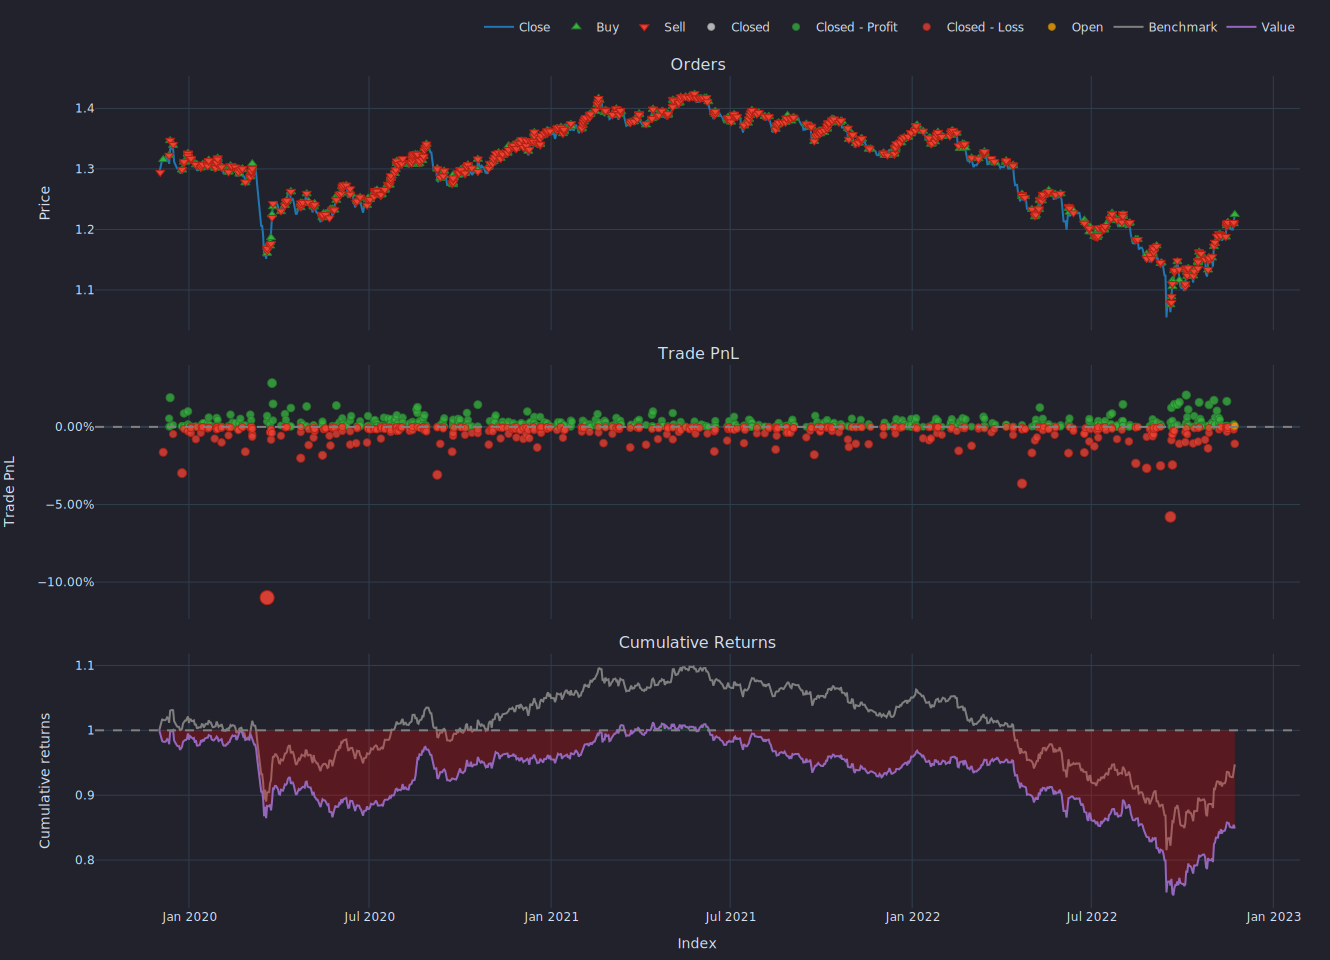

In [114]:
pf["GBPUSD"].resample("1d").plot().show_svg()

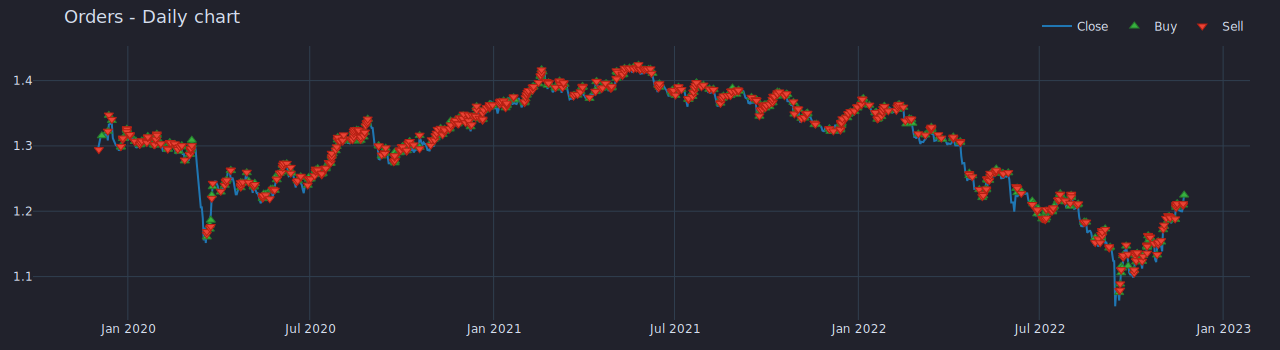

In [118]:
## We can also isolate pf.orders from the above pf.plot
kwargs = {"title_text" : "Orders - Daily chart", "title_font_size" : 18}
pf["GBPUSD"].orders.resample("1d").plot(xaxis=dict(rangeslider_visible=False),**kwargs).show_svg()

In [117]:
print(f"Max Drawdown [%]: {pf.stats()['Max Drawdown [%]']}")
print(f"Max Drawdown Duration: {pf.stats()['Max Drawdown Duration']}")
## Drawdown plot below shows top 5 drawdowns and 94 days of max drawdown duration includes
## 73 days for the declination phasd and 21 days for the recovery phase the max. peak drawdown
pf["GBPUSD"].drawdowns.plot(**{"title_text" : "Drawdowns Plot"}).show()

/var/folders/v1/9vbsmmyj7ml0rx9r62b_03c80000gn/T/ipykernel_4395/3835415149.py:1: UserWarning:

Object has multiple columns. Aggregated some metrics using <function mean at 0x107f2fd00>. Pass column to select a single column/group.

/var/folders/v1/9vbsmmyj7ml0rx9r62b_03c80000gn/T/ipykernel_4395/3835415149.py:2: UserWarning:

Object has multiple columns. Aggregated some metrics using <function mean at 0x107f2fd00>. Pass column to select a single column/group.



Max Drawdown [%]: 24.710354872369056
Max Drawdown Duration: 217 days 00:41:00
